## SIR Simulation on a Small World Network 

Karnav Raval // Summer 2020


Simulation of SIR on a Watts–Strogatz small-world network using NetworkX and Epidemics on Networks (EoN) modules. 


**Epidemics on Networks**
* Documentation: https://epidemicsonnetworks.readthedocs.io/en/latest/EoN.html
* Article (with examples): https://arxiv.org/pdf/2001.02436.pdf

**NetworkX**
* Documentation: https://networkx.github.io/documentation/stable/


In [1]:
import networkx as nx
from matplotlib import pyplot as plt
%matplotlib inline
import random
import EoN #Epidemics on Networks module

### Creating the Network

Consider is a population of 100 individuals, numbered from 0 to 99, linked by relationships of different strengths. We can represent this as a weighted network and use a **small world** graph. To do this, we use the **Watts–Strogatz** model; a random graph generation model that produces graphs with small-world properties.

run: **nx.watts_strogatz_graph?** for more information. 

This is initially done without edge weights and plotted below in a ring topology.

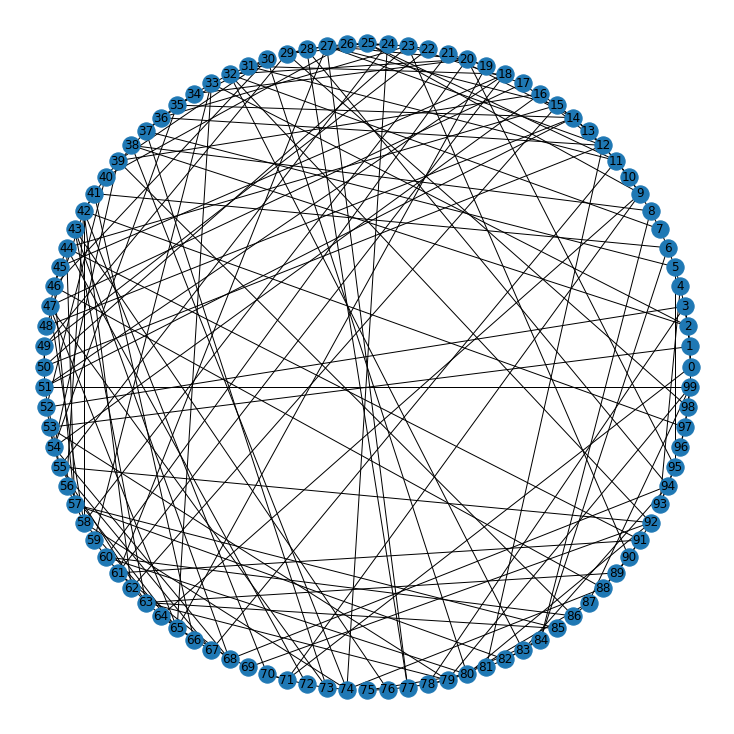

In [9]:
g = nx.watts_strogatz_graph(n = 100, k = 4, p = 0.6)

plt.figure(figsize = (10,10))
nx.draw_circular(g, with_labels = True)

### Adding Edge Weights

Now let's assign random edge weights to the graph. **Note**: everytime the code is run, new random edge weights are assigned. 

In [29]:
g.edges? #important function

(-1.1151292642143011,
 1.0762708409150614,
 -1.0094884900742245,
 1.0987614961591567)

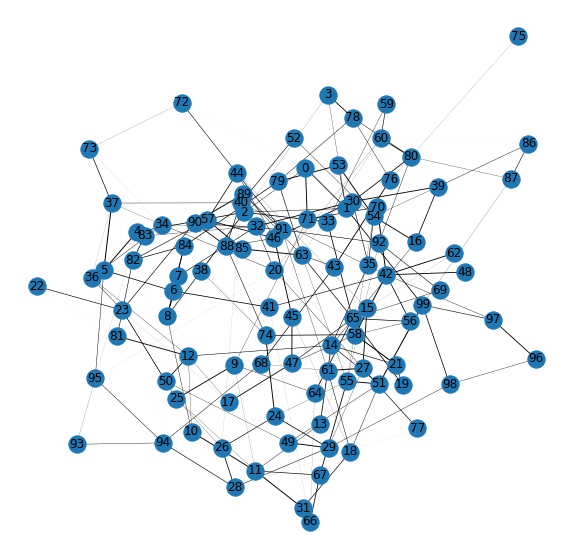

In [31]:
E = g.number_of_edges()

#initializing random weights
w = [random.random() for i in range(E)] #maybe add seed to generate same random weights each time
s = max(w)
w = [ i/s for i in w ] #normalizing
len(w)

k = 0

for i, j in g.edges():
    g[i][j]['weight'] = w[k]
    k += 1

edgewidth = [d['weight'] for (u,v,d) in g.edges(data=True)]

# Layout: Position nodes using Fruchterman-Reingold force-directed algorithm.
pos = nx.spring_layout(g) 
#pos = nx.spring_layout(g, iterations=50)

#assign labels to nodes
labels = {}
for i in range(100):
    labels[i] = i
    

# rendering
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_edges(g, pos, width = edgewidth, node_size = 500)
nx.draw_networkx_labels(g, pos, labels)
plt.axis('off')

### Simulating SIR 

Now we are interested in what happens if 1 of these individuals get sick with an infectious disease. Let's illustrate the dynamics of disease spread for two distinct scenarios: 

* Spread of infection: $R_o > 1$
* Extinction of Infection: $R_o < 1$

Recall that: 

$$R_o = \frac{\beta}{\gamma}$$

where $\beta$ is the infection rate and $\gamma$ is the recovery rate. So we can simulate the above 2 scenarios by varying $\beta$ and $\gamma$.

Note that we can also take into account the strength of the relationship by weighting $\beta$ with the network weights. This makes sense because we may assume the stronger the relationship between 2 individuals, the higher the probability of disease transmission.

### 1. Spread of Infection ($R_o > 1$)

Let's apply the SIR model (without vital dynamics) to this network with parameters such that $R_o > 1$. We can do this using the Gillespie algorithm for solving the SIR model. See the [wikipedia page](https://en.wikipedia.org/wiki/Gillespie_algorithm#Another_example:_The_SIR_epidemic_without_vital_dynamics) for more information. 


The network's graph is plotted at 5 snapshots in time, with nodes colour-coded depending on their disease state. For the sake of clarity, let's also plot the overall evolution of the disease, showing at which step in time the network snapshot has been taken. 

In [35]:
EoN.Gillespie_SIR? #important function 

5.999999999999999
doing Gillespie simulation
done with simulation, now plotting


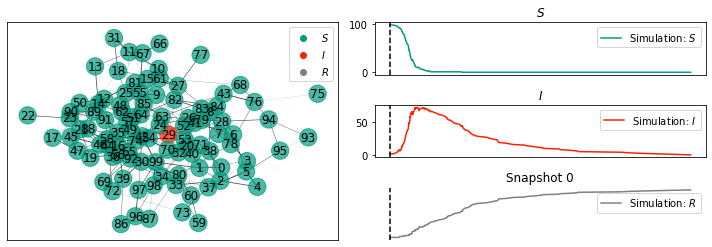

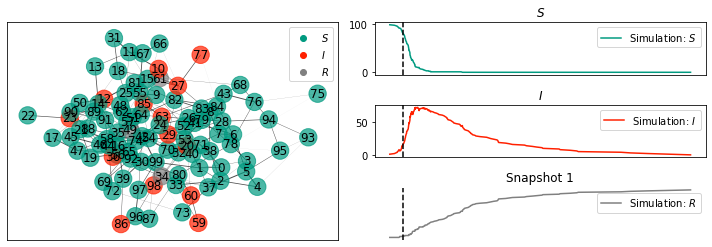

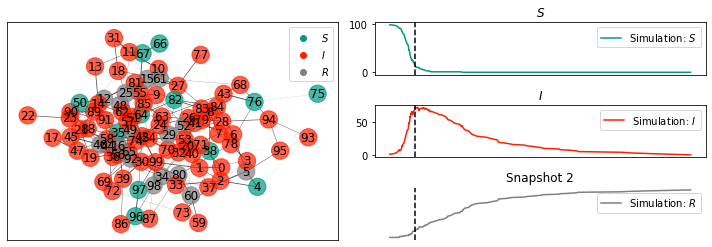

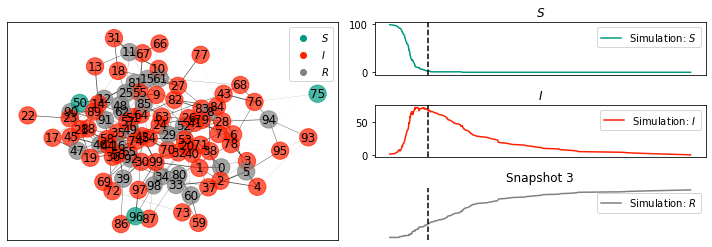

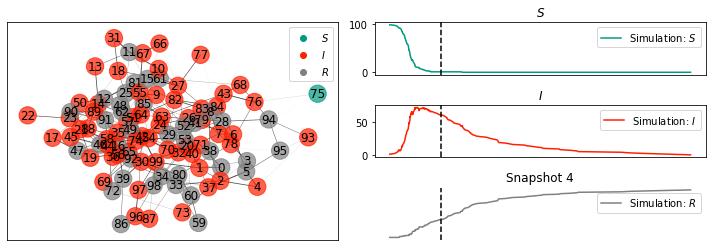

In [34]:
gamma = 0.2  
beta = 1.2 
r_0 = beta/gamma
print(r_0)
N = 100 # population size
I0 = 1   # intial infected  
R0 = 0   # intial recovered
S0 = N - I0 - R0 # intial susceptible

pos = nx.spring_layout(g)

#optional arguments to be passed on to the networkx plotting command.
nx_kwargs = {"with_labels":True, "pos": pos, "width": edgewidth, "alpha": 0.7} 


print("doing Gillespie simulation")

sim = EoN.Gillespie_SIR(g, tau = beta, gamma = gamma, rho = I0/N, return_full_data=True)
#sim = EoN.Gillespie_SIR(g, tau = beta, gamma=gamma, rho = I0/N, transmission_weight="weight", return_full_data=True)

print("done with simulation, now plotting")

for i in range(0,5,1):
    sim.display(time = i,  **nx_kwargs)
    plt.axis('off') 
    plt.title("Snapshot {}".format(i))
    plt.draw()

Observe that after only 5 time units the diffusion of the disease is evident (we have already passed the peak of infections!). We can also look at the simulation near the end and observe what the network looks like at that point in time. 

See below that **all** individuals have contracted the disease and have are either still infective or are removed. Actually snapshot 4 (above) was the last time that there was a susceptible individual.  

(<matplotlib.axes._subplots.AxesSubplot at 0x152510f150>,
  <matplotlib.axes._subplots.AxesSubplot at 0x1524fdd350>])

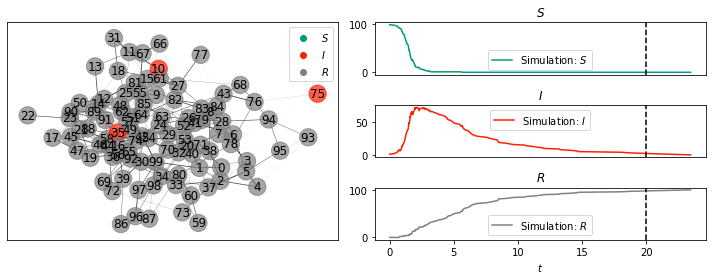

In [57]:
sim.display(time = 20,  **nx_kwargs)

### 2. Extinction of Infection ($R_o < 1$)

Let's apply the SIR model (without vital dynamics) to the same network with parameters such that $R_o < 1$.  Simulating with the Gillespie algorithm, same as before. 

0.6666666666666667
doing Gillespie simulation
done with simulation, now plotting


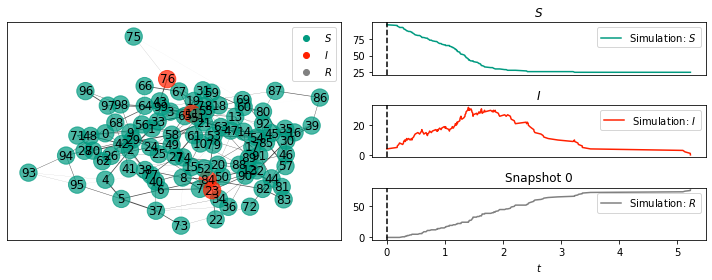

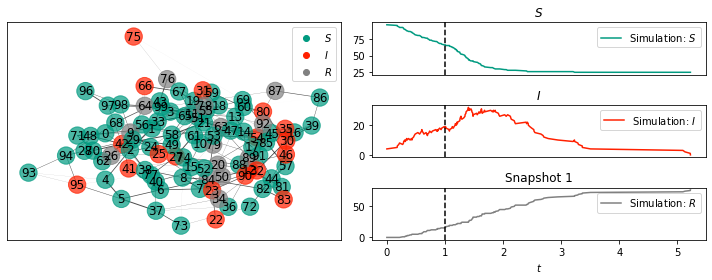

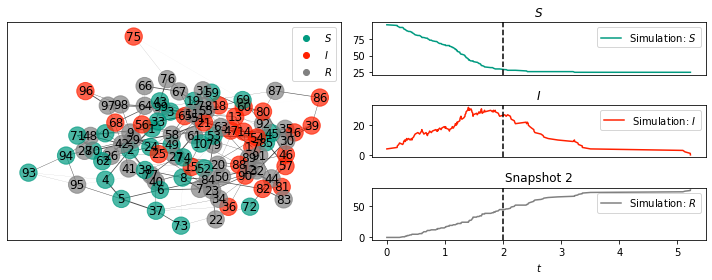

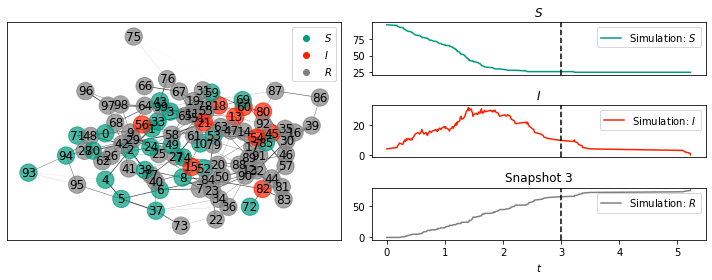

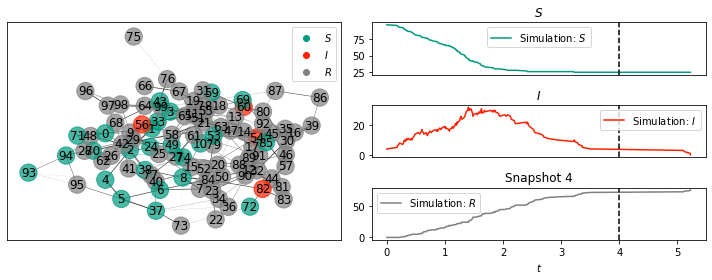

In [59]:
gamma = 1.2  
beta = 0.8 
r_0 = beta/gamma
print(r_0)
N = 100 # population size
I0 = 4   # intial number of infected individuals 
R0 = 0
S0 = N - I0 -R0

pos = nx.spring_layout(g)


#optional arguments to be passed on to the networkx plotting command.
nx_kwargs = {"with_labels":True, "pos": pos, "width": edgewidth, "alpha": 0.7} 

print("doing Gillespie simulation")
sim = EoN.Gillespie_SIR(g, tau = beta, gamma=gamma, rho = I0/N, return_full_data=True)
#sim = EoN.Gillespie_SIR(g, tau = beta, gamma=gamma, rho = I0/N, transmission_weight="weight", return_full_data=True)
print("done with simulation, now plotting")

for i in range(0,5,1):
    sim.display(time = i,  **nx_kwargs) 
    plt.title("Snapshot {}".format(i))
    plt.draw()

Observe that in this case, the number of infectives starts to decrease between the 1st and 2nd time step and the infective disease quickly dies out without infecting all individuals.   

### Next Steps: 

* Plot/Show adjaceny matrix of network (as heatmap)
* Incorporate dynamics of SIR disease with **vaccination**